In [8]:
# Imports
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch
import numpy as np
from collections import Counter


In [9]:
# Data Paths
data_dir = "chest_xray"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")
test_dir = os.path.join(data_dir, "test")

print(os.listdir(data_dir))
print(os.listdir(train_dir))


['chest_xray', 'test', 'train', 'val', '__MACOSX']
['NORMAL', 'PNEUMONIA']


In [10]:
# Define Transformations
imagenet_mean = [0.485, 0.456, 0.406]
imagenet_std = [0.229, 0.224, 0.225]

train_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])

val_test_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=imagenet_mean, std=imagenet_std)
])


In [11]:
# Build Datasets and Dataloaders
train_data = datasets.ImageFolder(root=train_dir, transform=train_transform)
val_data = datasets.ImageFolder(root=val_dir, transform=val_test_transform)
test_data = datasets.ImageFolder(root=test_dir, transform=val_test_transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader = DataLoader(val_data, batch_size=32, shuffle=False)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False)

print(f"Classes: {train_data.classes}")
print(f"Train images: {len(train_data)}, Val images: {len(val_data)}, Test images: {len(test_data)}")


Classes: ['NORMAL', 'PNEUMONIA']
Train images: 5216, Val images: 16, Test images: 624


In [12]:
# Count Class Distribution
train_counts = Counter([label for _, label in train_data.samples])
val_counts = Counter([label for _, label in val_data.samples])
test_counts = Counter([label for _, label in test_data.samples])

print("Train class counts:", train_counts)
print("Validation class counts:", val_counts)
print("Test class counts:", test_counts)


Train class counts: Counter({1: 3875, 0: 1341})
Validation class counts: Counter({0: 8, 1: 8})
Test class counts: Counter({1: 390, 0: 234})


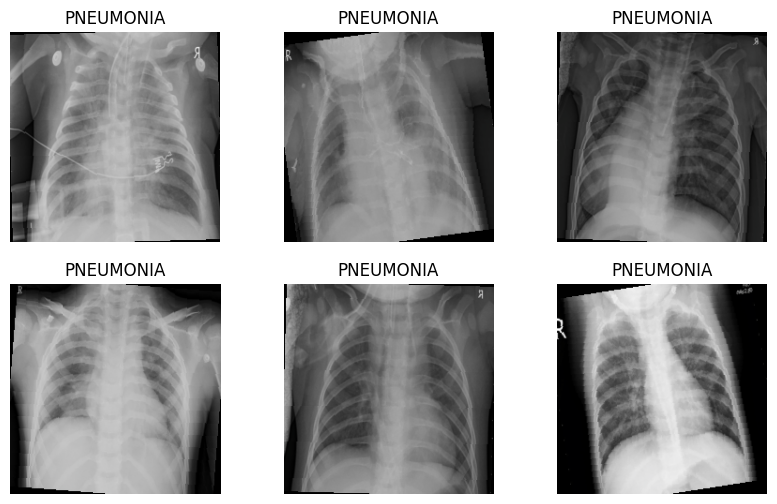

In [13]:
# Visualize Samples
def imshow_tensor(img_tensor):
    img = img_tensor.numpy().transpose((1, 2, 0))
    img = np.clip(img * np.array(imagenet_std) + np.array(imagenet_mean), 0, 1)
    plt.imshow(img)
    plt.axis('off')

data_iter = iter(train_loader)
images, labels = next(data_iter)

plt.figure(figsize=(10, 6))
for i in range(6):
    plt.subplot(2, 3, i+1)
    imshow_tensor(images[i])
    plt.title(train_data.classes[labels[i]])
plt.show()


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.8208281].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.5005665].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.3785625].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.465708].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..1.7859696].


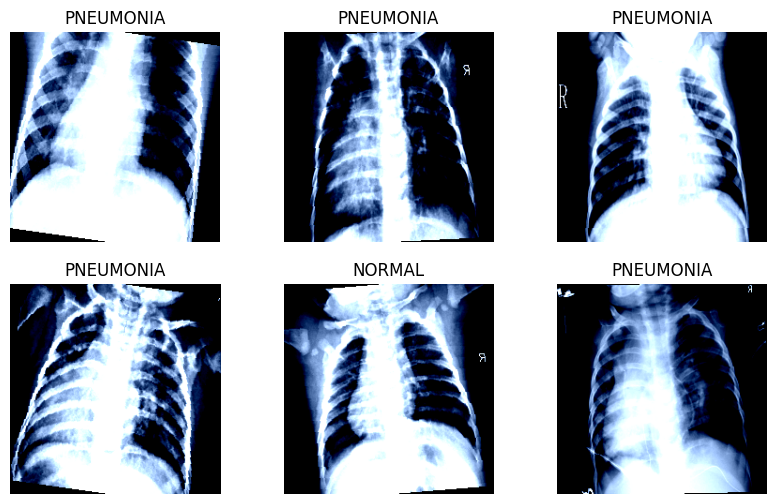

In [ ]:
# Normalized Debug Check
plt.figure(figsize=(10,6))
for i in range(6):
    image, label = next(iter(train_loader))
    plt.subplot(2,3,i+1)
    plt.imshow(np.transpose(image[0].numpy(), (1,2,0)))
    plt.title('PNEUMONIA' if label[0] == 1 else 'NORMAL')
    plt.axis('off')
plt.show()
